<a href="https://colab.research.google.com/github/taukhidwb/Prediksi-Tingkat-Polusi-Carbon-Pesawat/blob/main/Prediksi_Tingkat_Polusi_Carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Memperkirakan Tingkat Polusi Carbon**

Tujuan pembuatan aplikasi ini adalah memperkirakan tingkat polusi carbon yang dihasilkan pesawat terbang. Data yang digunakan berasal dari dataset Popular Flight and Emmision Data.

**Pembersihan Data**


1.   Melakukan import Data
2.   Memeriksa dan memenuhi kelengkapan Data

In [23]:
# Melakukan import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
# Melakukan import data (file "Scored_DCA.csv") dan menampilkan datanya

df_polusi_carbon = pd.read_csv("Scored_DCA.csv")

df_polusi_carbon.head(11)

,index,airport,Carrier,Duration,price,layover,minutes,legs,plane1,plane2,aircraft_ID_1,aircraft_ID_2,Carbon Leg 1,Carbon Leg 2,Total Carbon,carbon utility,no-carbon utility,carbon prob,no-carbon prob
0,0,SMF,Delta Basic Economy,6h 28m,$904,MSP,388,2,Boeing 737,Airbus A319,61,40.0,1034.42,670.11,1704.53,-12.393040,-7.557662,0.000504,0.001199
1,1,SMF,United Basic Economy,6h 42m,$518,ORD,402,2,Boeing 737,Airbus A319,61,40.0,1217.25,454.37,1671.62,-7.339093,-3.530377,0.079011,0.067256
2,2,SMF,Delta Basic Economy,6h 47m,$841,ATL,407,2,Boeing 737,Airbus A321,61,42.0,1433.32,350.14,1783.46,-11.676855,-6.900359,0.001032,0.002313
3,3,SMF,United Basic Economy,6h 51m,$683,ORD,411,2,Boeing 737,Airbus A319,61,40.0,1217.25,454.37,1671.62,-9.481323,-5.251885,0.009275,0.012025
4,4,SMF,Delta Basic Economy,6h 57m,$591,DTW,417,2,Boeing 737,Airbus A321,61,42.0,1378.34,264.40,1642.74,-8.249635,-4.292014,0.031786,0.031402
5,5,SMF,American Basic Economy,7h 3m,$648,DFW,423,2,Airbus A321,Boeing 737,42,229.0,864.07,577.28,1441.35,-8.730043,-4.886717,0.019661,0.017325
6,6,SMF,Delta Basic Economy,7h 3m,$841,ATL,423,2,Boeing 737,Airbus A321,61,42.0,1433.32,350.14,1783.46,-11.676855,-6.900359,0.001032,0.002313
7,7,SMF,United Basic Economy,7h 4m,$597,ORD,424,2,Airbus A319,Airbus A320,40,41.0,1250.95,398.36,1649.31,-8.336004,-4.354614,0.029156,0.029497
8,8,SMF,American Basic Economy,7h 10m,$790,DFW,430,2,Boeing 737,Boeing 737,229,229.0,687.46,577.28,1264.74,-10.345971,-6.368257,0.003907,0.003938
9,9,SMF,American Basic Economy,7h 29m,$763,DFW,449,2,Airbus A321,Airbus A321,42,42.0,864.07,723.87,1587.94,-10.412098,-6.086555,0.003657,0.005219


**Membuat Salinan File Asli untuk Data yang Akan Diolah**

In [26]:
# Memilih kolom (unsur) data yang diinginkan

kolom_terpilih = ['minutes', 'aircraft_ID_1', 'aircraft_ID_2', 'Carbon Leg 1', 'Carbon Leg 2', 'Total Carbon']
data_terpilih = df_polusi_carbon[kolom_terpilih]

# Menyimpan data terpilih ke dalam file baru (data_terpilih.csv)

data_terpilih.to_csv('data_terpilih.csv', index=False)

In [44]:
# Melakukan import data (file "data_terpilih.csv")

df_data_terpilih = pd.read_csv("data_terpilih.csv")

# Menampilkan data

df_data_terpilih.head(11)

,minutes,aircraft_ID_1,aircraft_ID_2,Carbon Leg 1,Carbon Leg 2,Total Carbon
0,388,61,40.0,1034.42,670.11,1704.53
1,402,61,40.0,1217.25,454.37,1671.62
2,407,61,42.0,1433.32,350.14,1783.46
3,411,61,40.0,1217.25,454.37,1671.62
4,417,61,42.0,1378.34,264.40,1642.74
5,423,42,229.0,864.07,577.28,1441.35
6,423,61,42.0,1433.32,350.14,1783.46
7,424,40,41.0,1250.95,398.36,1649.31
8,430,229,229.0,687.46,577.28,1264.74
9,449,42,42.0,864.07,723.87,1587.94


In [45]:
# Memeriksa kolom (unsur) yang mengandung missing value (NaN)

df_data_terpilih.isnull().sum()

minutes          0
aircraft_ID_1    0
aircraft_ID_2    2
Carbon Leg 1     0
Carbon Leg 2     2
Total Carbon     0
dtype: int64

In [28]:
# Ubah missing value pada setiap kolomnya dengan 0 (nol)

df_polusi_carbon_baru = df_data_terpilih.replace(np.nan,0)
df_polusi_carbon_baru.isnull().sum()

minutes          0
aircraft_ID_1    0
aircraft_ID_2    0
Carbon Leg 1     0
Carbon Leg 2     0
Total Carbon     0
dtype: int64

In [29]:
# Melihat type data setiap kolom

df_polusi_carbon_baru.dtypes

minutes            int64
aircraft_ID_1      int64
aircraft_ID_2    float64
Carbon Leg 1     float64
Carbon Leg 2     float64
Total Carbon     float64
dtype: object

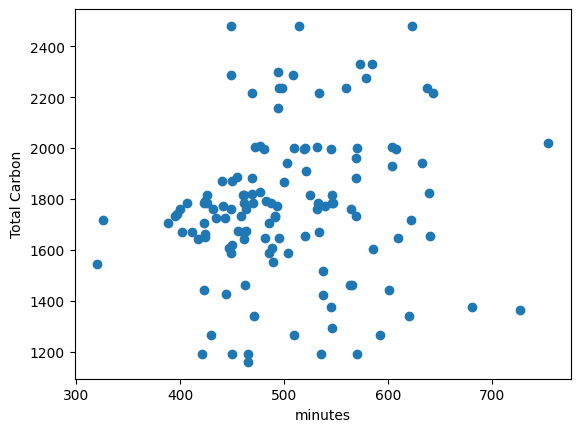

In [30]:
# Melakukan ploting data minutes vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['minutes'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("minutes")
plt.ylabel("Total Carbon")
plt.show()

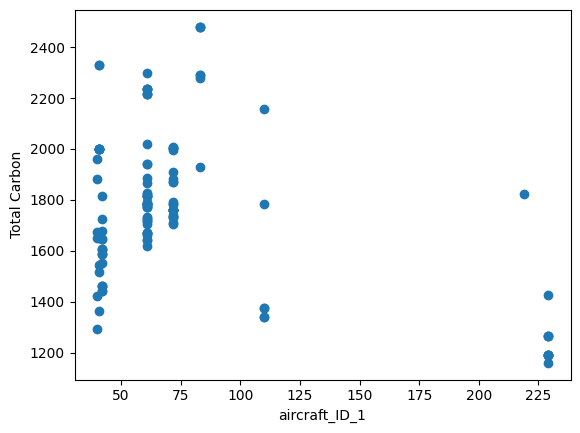

In [31]:
# Melakukan ploting data aircraft_ID_1 vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['aircraft_ID_1'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("aircraft_ID_1")
plt.ylabel("Total Carbon")
plt.show()

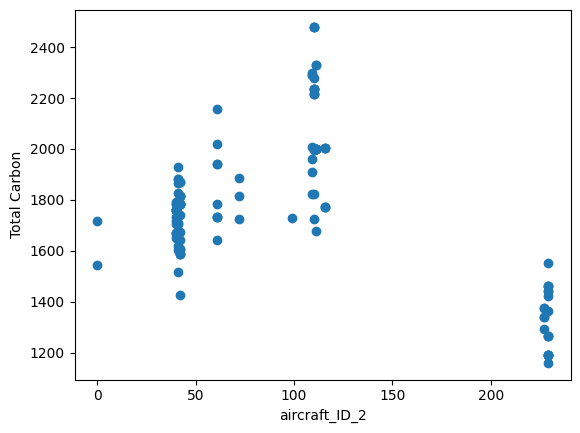

In [32]:
# Melakukan ploting data aircraft_ID_2 vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['aircraft_ID_2'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("aircraft_ID_2")
plt.ylabel("Total Carbon")
plt.show()

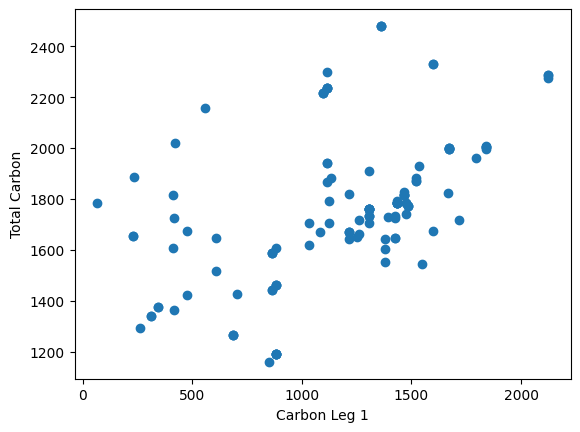

In [33]:
# Melakukan ploting data Carbon Leg 1 vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['Carbon Leg 1'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("Carbon Leg 1")
plt.ylabel("Total Carbon")
plt.show()

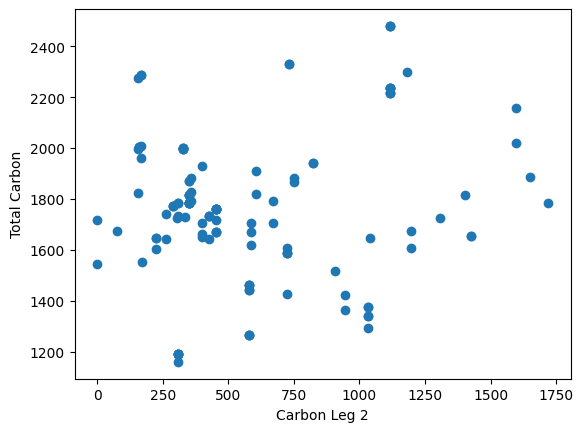

In [34]:
# Melakukan ploting data Carbon Leg 2 vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['Carbon Leg 2'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("Carbon Leg 2")
plt.ylabel("Total Carbon")
plt.show()

**Pengaplikasian Machine Learning**

1.   Memisahkan variabel independen (x) dan variabel dependen (y)
2.   Membagi dataset menjadi data latih (training set) dan data uji (test set)
3.   Membagi dataset menjadi data latih (training set) dan data uji (test set)
4.   Membuat objek model regresi linear
5.   Melatih model dengan data latih
6.   Memprediksi jumlah penduduk menggunakan data uji
7.   Menghitung mean squared error (MSE) untuk mengevaluasi kinerja model
8.   Menampilkan hasil prediksi dan evaluasi model

In [35]:
# Extract the x and y values from the DataFrame

x = df_polusi_carbon_baru[['minutes','aircraft_ID_1', 'aircraft_ID_2', 'Carbon Leg 1', 'Carbon Leg 2']]
y = df_polusi_carbon_baru['Total Carbon']

In [36]:
# Membagi dataset menjadi data latih (training set) dan data uji (test set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
# Membuat objek model regresi linear

model = LinearRegression()

In [38]:
# Melatih model dengan data latih

model.fit(x_train, y_train)

LinearRegression()

In [39]:
# Memprediksi

y_pred = model.predict(x_test)

In [41]:
# Menampilkan hasil prediksi

print('Hasil Prediksi:', y_pred)

Hasil Prediksi: [1374.2  2158.55 1648.3  1791.79 1264.74 1461.46 1655.43 2001.61 1760.58
 1649.31 1608.05 1620.36 1866.28 1995.88 1422.18 1783.46 1783.46 1427.19
 1661.1  1264.74 1784.58 1190.16 1190.16 1816.8  1341.48 1717.11]


In [40]:
# Menghitung mean squared error (MSE) untuk mengevaluasi kinerja model



In [22]:
# Melakukan evaluasi kinerja model

# Menghitung Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Menghitung Root Mean Squared Error (RMSE)

rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

# Menghitung R2 (R-squared)

akar = r2_score(y_pred, y_test)
print('R2:', akar)

R2: 1.0
